A continuación se muestra una matriz de expresión genética:

In [45]:
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [46]:
ncol(genexp)
nrow(genexp)

[1] 482

[1] 86

### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

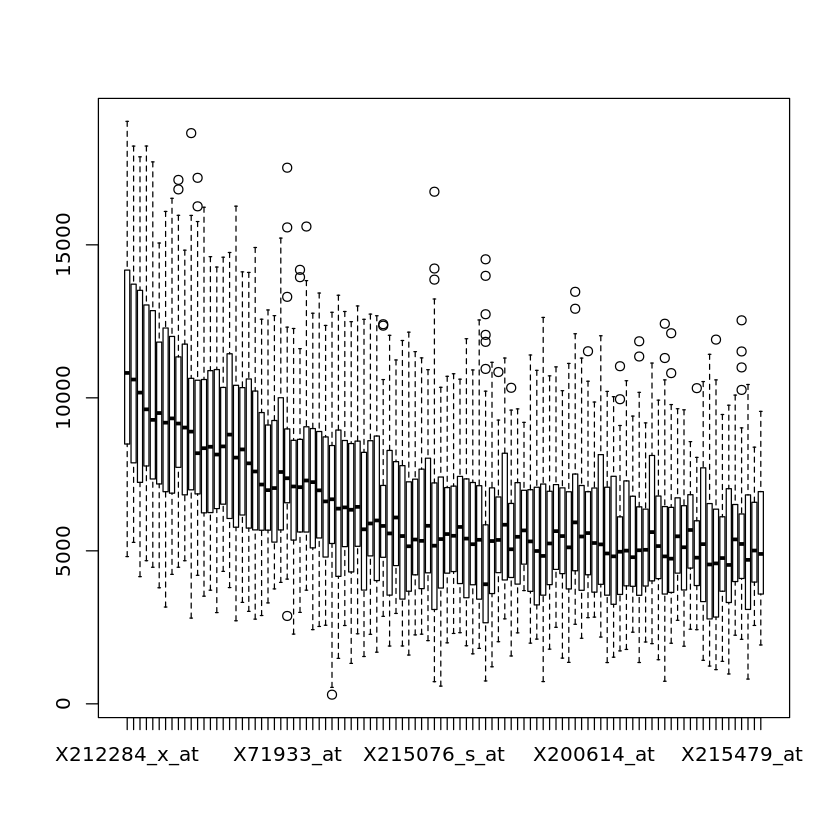

In [47]:
to_norm <- genexp[,2:ncol(genexp)]
#Antes de normalizar tratamos los outliers
#Boxplot antes de tratarlos
boxplot(to_norm[,1:100])

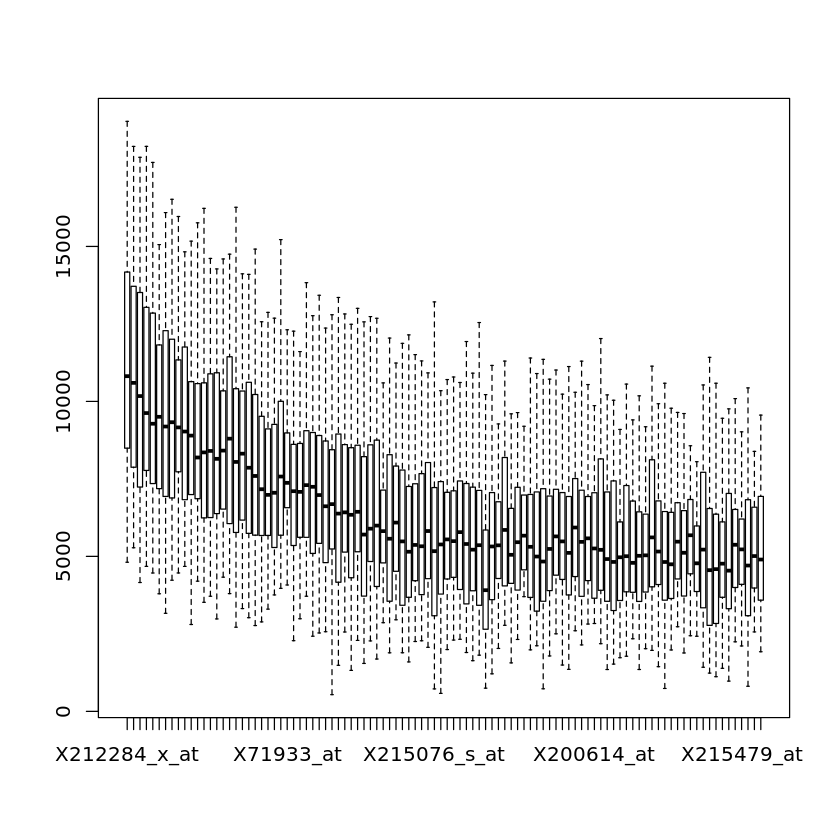

In [48]:
#En este caso consideramos outliers todo lo que sea  Q3 + 1.5*RIC y lo sustituimos por ese valor máximo

for (i in 1:ncol(to_norm)){
    x <- to_norm[,i]
    qnt  <- quantile(x, probs=c(.25, .75), na.rm = T)
    caps <- quantile(x, probs=c(.1, .90), na.rm = T)    
    H <- 1.5 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    to_norm[,i]<-x
}

#Boxplot despues de eliminar los outlier
boxplot(to_norm[,1:100])

In [76]:
#Ahora pasamos a normalizar restando por la media y dvidiendo por la varianza
norm <- (to_norm - colMeans(to_norm)) / sapply(to_norm, sd, na.rm=T)


dfnormInit <- norm

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [50]:
# Nueva columna que indic si la fila es una fila correspondiente a cancer(1) o a normal(0)
norm$indicador.cancer <- ifelse(grepl('^Cancer', genexp$X),"cancer","sano")
norm$indicador.cancer.n[norm$indicador.cancer=="cancer"] <- 1
norm$indicador.cancer.n[norm$indicador.cancer=="sano"]<- 0
head(norm)

X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,indicador.cancer,indicador.cancer.n
-0.6068573,1.1543163,2.423314,1149.7949,671.2259,522.2262,-0.07807064,0.8881009,1.789304,616.6670,,1.3086349,0.20850336,-1.5381761,-2.855180,-2.483166,-2.4849498,2.47079331,-0.1846288,sano,0
-0.0697682,3.3903335,3.079516,1119.6567,1114.4344,373.3246,0.96412313,3.2429109,1.480423,832.4644,,0.0337380,-1.07783804,-1.0493311,-2.799721,-2.200917,-1.1684148,3.67806058,-0.2665016,cancer,1
-0.6798470,0.3371288,3.514317,941.6444,576.0454,605.6630,0.36640836,0.6686769,1.258262,704.0952,,0.8173378,0.57443494,-0.8423570,-2.532549,-2.494501,-1.7154480,0.67587115,0.8795125,sano,0
-0.3527254,2.7938807,3.066888,1365.7827,608.2972,556.0504,0.48191035,1.0780761,2.271543,485.9988,,0.5721208,-0.60283073,-0.6306118,-2.537597,-3.293316,-2.1165709,1.70196494,-0.4361492,cancer,1
-0.2827238,1.1178025,2.134935,1203.8122,539.8418,566.1452,0.27944203,1.8434525,1.337339,472.8671,,2.5607907,0.05066469,-0.2398523,-2.366674,-3.034077,-0.9398606,1.15391102,0.2620701,sano,0
-0.4442531,1.1319675,1.959353,876.9044,607.9032,510.3052,0.23849560,0.7889558,1.267838,774.0789,,3.1581061,-0.62564902,0.7172859,-1.856113,-3.245817,-1.9196035,0.01107223,-0.3191305,cancer,1


In [51]:
#Dividimos en entrenamiento y test
itrain<-sample(1:nrow(norm),nrow(norm)*0.7)
gen.train<-norm[itrain,]
gen.test<-norm[-itrain,]
nrow(gen.train)
nrow(gen.test)

[1] 60

[1] 26

In [56]:
#creación del modelo
model<- glm(data=gen.train,formula=indicador.cancer.n~.,family = binomial(link='logit'))


In [75]:
y_predict<-predict(model,gen.test)

umbral <- 0
y_factor<-ifelse(y_predict>umbral,1,0)

#matriz de confusión
M <- table(y_factor,gen.test$indicador.cancer.n)
'Matriz de confusion'
M

paste("Precision:", M[1,1]/(M[1,2]+M[1,1]))
paste("Exhausitivad:", M[1,1]/(M[2,1]+M[1,1]))
paste("Exactitud:",(M[1,1]+M[2,2])/sum(sum(M)))
p<-M[1,1]/(M[1,2]+M[1,1])
e<-M[1,1]/(M[2,1]+M[1,1])
b<-0.5
F <- (1+b^2)*(p*e)/(b^2*p+e)
paste("F0.5:", F)

#

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

[1] "Matriz de confusion"

        
y_factor  0  1
       0 11  4
       1  3  8

[1] "Precision: 0.733333333333333"

[1] "Exhausitivad: 0.785714285714286"

[1] "Exactitud: 0.730769230769231"

[1] "F0.5: 0.743243243243243"

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"Removed 1 rows containing missing values (geom_path)."

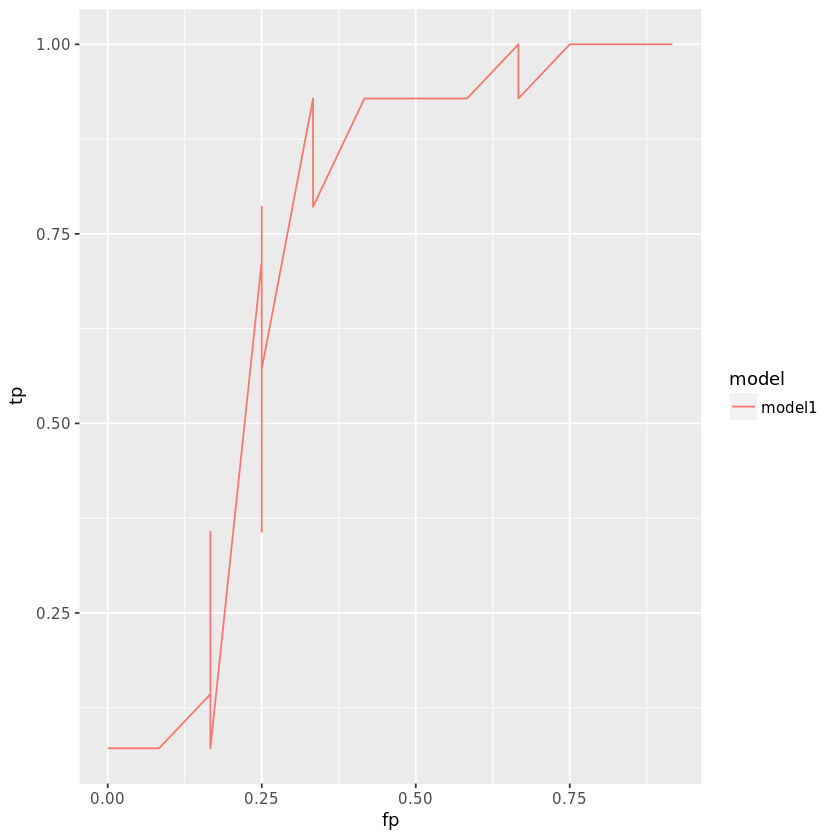

In [61]:
library(ggplot2)
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)

    M<-table(y_est,gen.test$indicador.cancer.n)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

y_predict<-predict(model,gen.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,gen.test$indicador.cancer.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

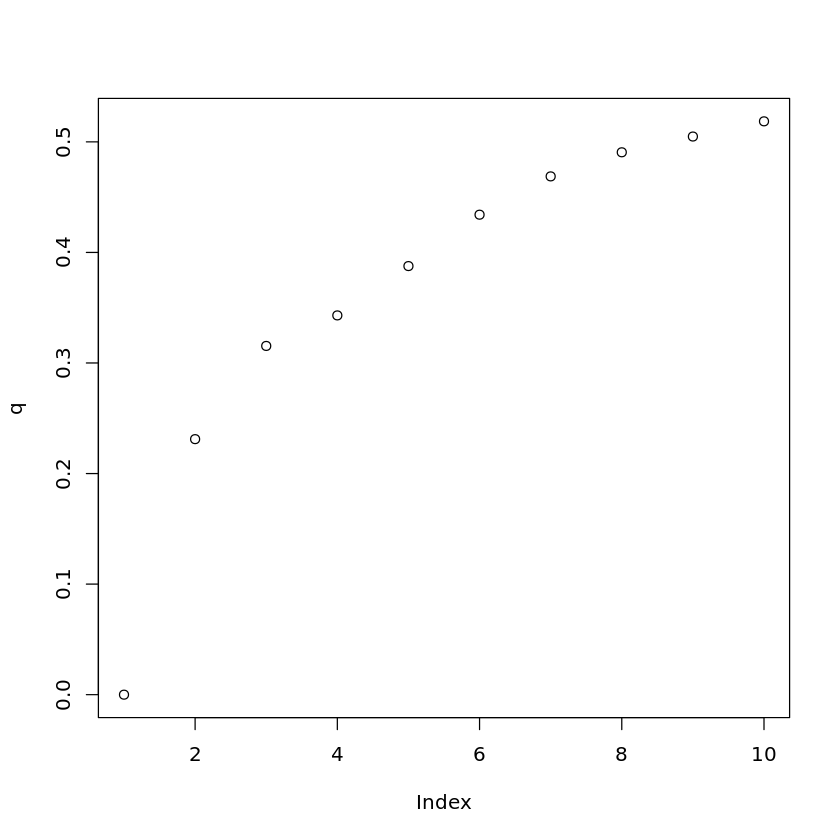

In [85]:
q<-c()
for (k in 1:10){
    myclust<-kmeans(dfnormInit,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

No hay un valor claro para el numeo de cluster optimo, podríamos elegir 6 clusters, pero no saco ninguna conclusión relevante sobre los cluster, lo unico que suele meter en el mismo cluster valores iguales (BC0043T) se Cancer o normal.

In [89]:
myclust<-kmeans(dfnormInit,6)
table(genexp$X, myclust$cluster)

                
                 1 2 3 4 5 6
  Cancer.BC0043T 1 0 0 0 0 0
  Cancer.BC0051T 1 0 0 0 0 0
  Cancer.BC0057T 1 0 0 0 0 0
  Cancer.BC0087T 1 0 0 0 0 0
  Cancer.BC0109T 1 0 0 0 0 0
  Cancer.BC0112T 1 0 0 0 0 0
  Cancer.BC0113T 1 0 0 0 0 0
  Cancer.BC0117T 1 0 0 0 0 0
  Cancer.BC0122T 1 0 0 0 0 0
  Cancer.BC0126T 1 0 0 0 0 0
  Cancer.BC0127T 1 0 0 0 0 0
  Cancer.BC0138T 1 0 0 0 0 0
  Cancer.BC0142T 0 0 1 0 0 0
  Cancer.BC0147T 1 0 0 0 0 0
  Cancer.BC0151T 0 0 1 0 0 0
  Cancer.BC0152T 1 0 0 0 0 0
  Cancer.BC0153T 1 0 0 0 0 0
  Cancer.BC0155T 1 0 0 0 0 0
  Cancer.BC0156T 1 0 0 0 0 0
  Cancer.BC0158T 0 0 1 0 0 0
  Cancer.BC0159T 0 0 1 0 0 0
  Cancer.BC0160T 0 0 0 0 1 0
  Cancer.BC0163T 0 0 0 0 1 0
  Cancer.BC0164T 0 0 1 0 0 0
  Cancer.BC0165T 0 0 1 0 0 0
  Cancer.BC0168T 0 0 0 0 1 0
  Cancer.BC0170T 0 0 0 0 1 0
  Cancer.BC0171T 0 0 0 0 1 0
  Cancer.BC0172T 0 0 0 1 0 0
  Cancer.BC0173T 0 0 0 0 1 0
  Cancer.BC0174T 0 0 0 1 0 0
  Cancer.BC0177T 0 0 0 1 0 0
  Cancer.BC0179T 0 0 0 1 0

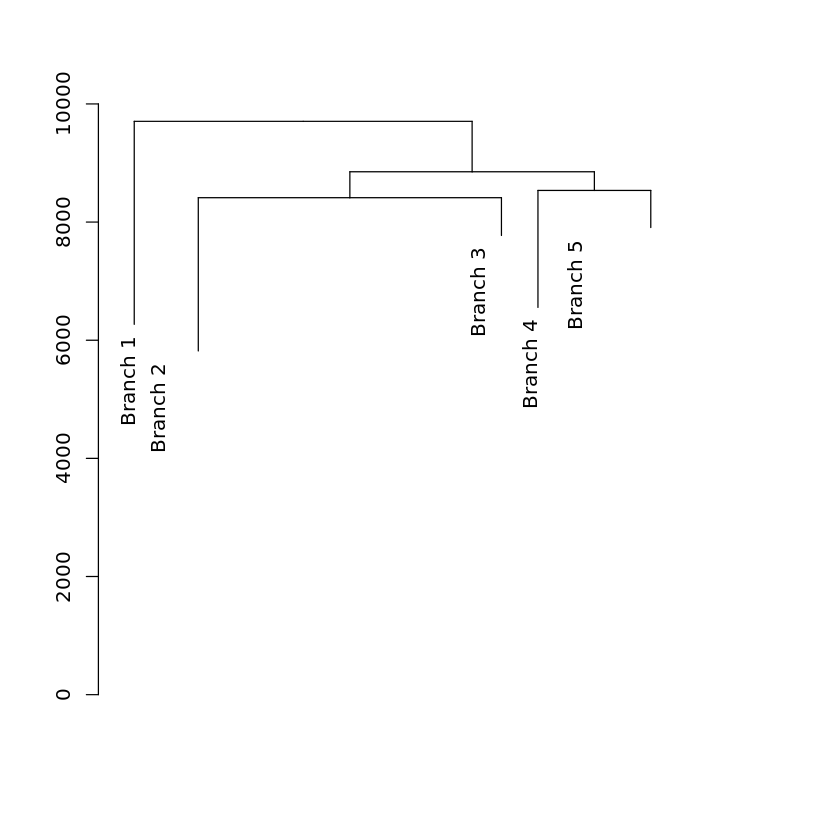

In [93]:
d <- dist(as.matrix(dfnormInit),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(cut(hcd,h=8000)$upper)

In [94]:
table(genexp$X,cutree(hc,6))

                
                 1 2 3 4 5 6
  Cancer.BC0043T 1 0 0 0 0 0
  Cancer.BC0051T 1 0 0 0 0 0
  Cancer.BC0057T 1 0 0 0 0 0
  Cancer.BC0087T 1 0 0 0 0 0
  Cancer.BC0109T 1 0 0 0 0 0
  Cancer.BC0112T 1 0 0 0 0 0
  Cancer.BC0113T 1 0 0 0 0 0
  Cancer.BC0117T 1 0 0 0 0 0
  Cancer.BC0122T 1 0 0 0 0 0
  Cancer.BC0126T 1 0 0 0 0 0
  Cancer.BC0127T 1 0 0 0 0 0
  Cancer.BC0138T 1 0 0 0 0 0
  Cancer.BC0142T 1 0 0 0 0 0
  Cancer.BC0147T 1 0 0 0 0 0
  Cancer.BC0151T 1 0 0 0 0 0
  Cancer.BC0152T 1 0 0 0 0 0
  Cancer.BC0153T 1 0 0 0 0 0
  Cancer.BC0155T 1 0 0 0 0 0
  Cancer.BC0156T 1 0 0 0 0 0
  Cancer.BC0158T 1 0 0 0 0 0
  Cancer.BC0159T 1 0 0 0 0 0
  Cancer.BC0160T 0 0 1 0 0 0
  Cancer.BC0163T 0 1 0 0 0 0
  Cancer.BC0164T 1 0 0 0 0 0
  Cancer.BC0165T 1 0 0 0 0 0
  Cancer.BC0168T 0 0 1 0 0 0
  Cancer.BC0170T 0 0 1 0 0 0
  Cancer.BC0171T 0 0 1 0 0 0
  Cancer.BC0172T 0 0 1 0 0 0
  Cancer.BC0173T 0 0 1 0 0 0
  Cancer.BC0174T 0 0 0 1 0 0
  Cancer.BC0177T 0 0 1 0 0 0
  Cancer.BC0179T 0 0 0 1 0

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

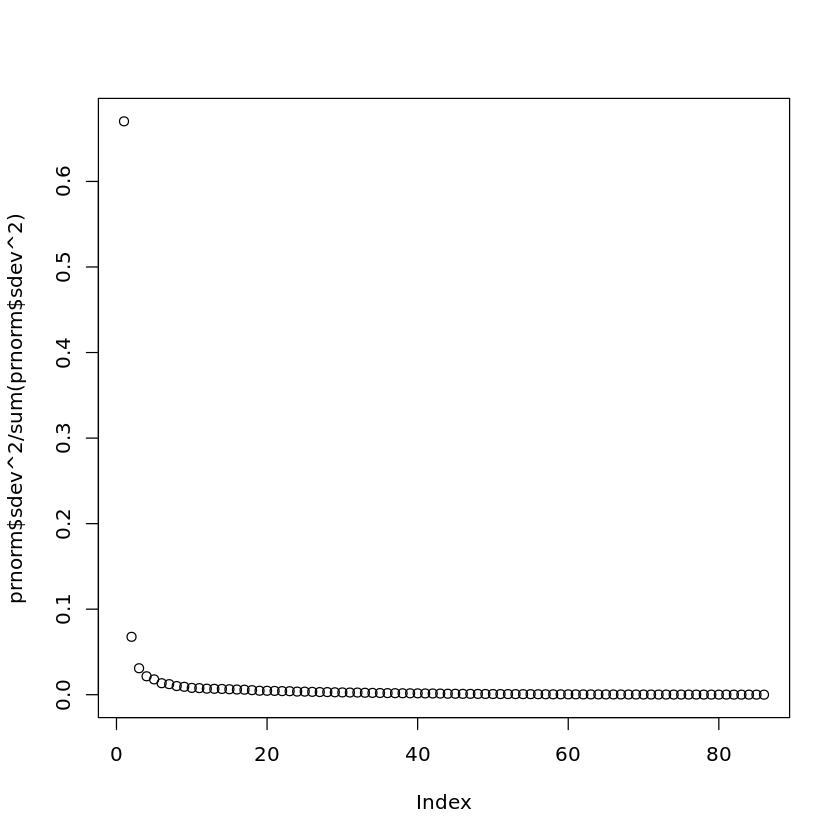

In [95]:
prnorm<-prcomp(dfnormInit, center = FALSE , scale. = FALSE)
plot(prnorm$sdev^2/sum(prnorm$sdev^2))
#Comprobamos que los dos primeros autovalores contienen aproximadamente el 70% de la varianza

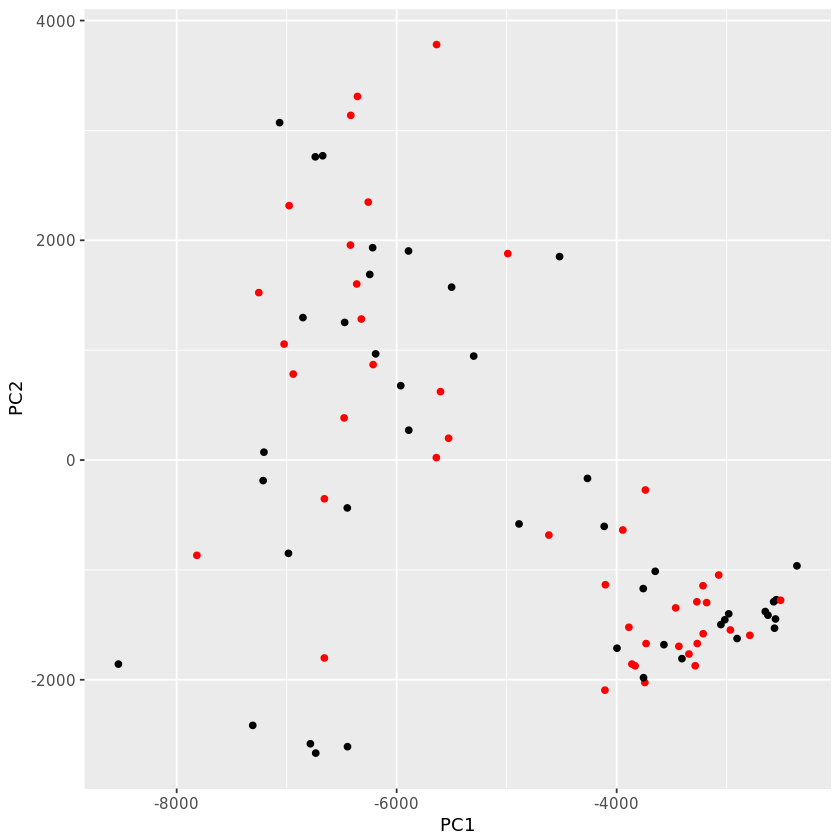

In [112]:
res <- ifelse(grepl('^Cancer', genexp$X),2,1)
dfPCA <- data.frame(res, prnorm$x[,c(1:2)])
ggplot(data=dfPCA, aes(x=PC1,y=PC2))+geom_point(color=res)


In [120]:
res1 <- ifelse(grepl('^Cancer', genexp$X),1,0)
dfPCA1 <- data.frame(res1, prnorm$x[,c(1:2)])
#Dividimos en entrenamiento y test
itrainPCA<-sample(1:nrow(dfPCA1),nrow(dfPCA1)*0.7)
PCA.train<-dfPCA1[itrainPCA,]
PCA.test<-dfPCA1[-itrainPCA,]

modelPCA<- glm(data=PCA.train,formula=res1~.,family = binomial(link='logit'))

Warning message:
"Removed 1 rows containing missing values (geom_path)."

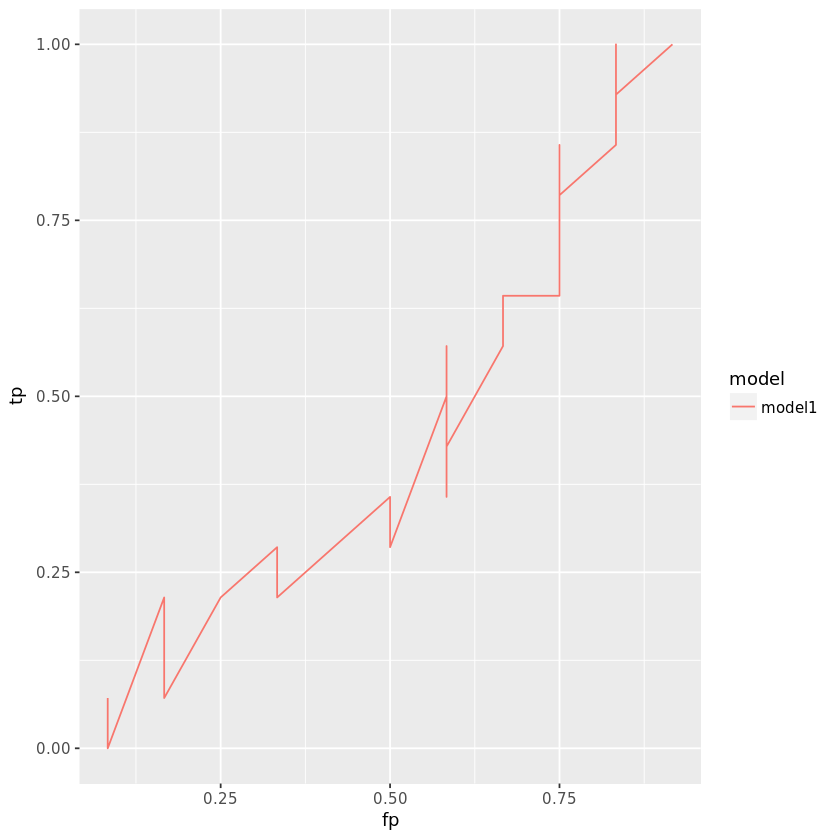

In [121]:
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)

    M<-table(y_est,PCA.test$res1)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

y_predict<-predict(modelPCA,PCA.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,gen.test$indicador.cancer.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

El grafico muestra que el modelo se adapta peor que el realizado en la primera parte